In [1]:
"""
Name: example_calibration.ipynb
Authors: Stephan Meighen-Berger
Shows an example calibration run of the module
"""

'\nName: example_calibration.ipynb\nAuthors: Stephan Meighen-Berger\nShows an example calibration run of the module\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
from tqdm import tqdm

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from fourth_day import Fourth_Day, config

In [6]:
# Some example settings
config['scenario']['class'] = 'Calibration'
config['scenario']['light prop'] = {
            "switch": True,
            "x_pos": 5.,
            "y_pos": 10.,
        }
config['scenario']['detector'] = {
    "switch": True,
    "type": "PMTSpec_Func",
    "response": True,
    "acceptance": "Flat",
    "mean detection prob": 1.
}

In [7]:
# Creating a fourth_day object
fd = Fourth_Day()

In [8]:
# Launching solver
fd.sim()

In [9]:
# Plotting standards
std_size = 6.
fontsize = 20.
lw=1.
h_length=0.2

In [10]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [11]:
fd.measured

,Detector 0,Detector 1,Detector 2,Detector 3,Detector 4,Detector 5,Detector 6,Detector 7,Detector 8,Detector 9,Detector 10,Detector 11
0,0.000801,0.0,0.0,0.0,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000801,0.0,0.0,0.0,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000801,0.0,0.0,0.0,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000801,0.0,0.0,0.0,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000801,0.0,0.0,0.0,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000801,0.0,0.0,0.0,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.000801,0.0,0.0,0.0,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.000801,0.0,0.0,0.0,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.000801,0.0,0.0,0.0,0.0031,0.0,0.0,0.0,0.0,0.0,0.0,0.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
C:\Users\steph\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


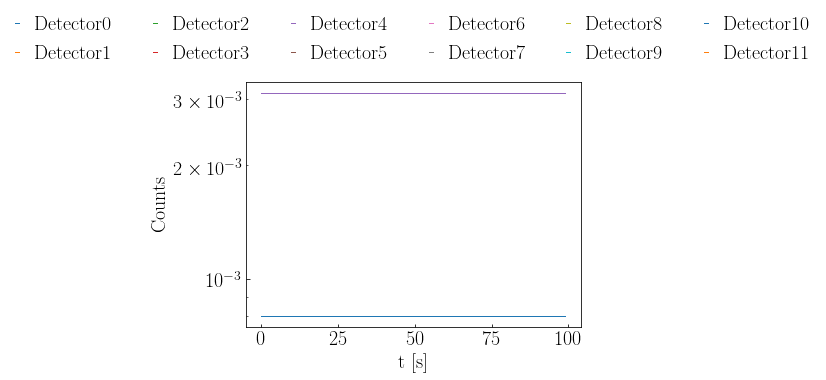

In [12]:
# Energy distributions
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
for detector in fd.measured.keys():
    # Random noise
    ax1.plot(fd.t,
             fd.measured[detector].values,
             lw=lw, label=r"$\mathrm{%s}$" % detector)
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\mathrm{t}\;[\mathrm{s}]$', fontsize=fontsize)
ax1.set_ylabel(r'$\mathrm{Counts}$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
# ax1.grid(True)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.35),
                  ncol=6, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
# ax1.set_ylim(1e-4,1e1)
# ax1.set_xlim(390., 400)
plt.tight_layout()
plt.show()